#### Эпизод 1

##### Решение

У вас есть картинки поверхности Луны. Они чёрно-белые, и это нормально - такая была камера. К сожалению, качество их не очень - контраст страдает, вместо честных градаций от чёрного до белого камера зафиксировала 42 оттенка серого. Давайте улучшим картинки, чтобы они более внятно воспринимались глазом.

**Задача** - переинтерполировать картинки, использовав весь доступный диапазон для улучшения контраста. Логика преобразования такая:

1. чёрно-белая картинка - это по сути простой 2D-массив, каждый элемент которого представляет собой 1 пиксель картинки (с цветными всё несколько сложнее),
2. каждый пиксель может иметь значения от 0 до 255,
3. реально у нас на этих нерезких картинках все пиксели находятся где-то внутри небольшого диапазона значений (условно, от 10 до 50 вместо полного спектра),
4. поэтому нужно считать картинку и аккуратно линейно "растянуть" диапазон, минимальное значение на исходной картинки должно получить значение 0 в выходном изображении, а максимальное на исходной - 255 на выходе.

In [1]:
import os
import numpy as np
from PIL import Image

def episode_1():
    relative_path = 'laba03/lunar_images/'
    for file_path in sorted(os.listdir(relative_path)):
        if 'raw' in file_path:
            # считаем картинку в numpy array
            img = Image.open(relative_path + file_path)
            data = np.array(img)
            
            # ... логика обработки
            updated_data = (data - data.min()) / (data.max() - data.min()) * 255
            updated_data = updated_data.astype(np.uint8)
            
            # запись картинки после обработки
            res_img = Image.fromarray(updated_data)
            
            new_file_path = file_path.replace('raw', 'ready')
            print(f"Сохранено в {relative_path + new_file_path}")
            res_img.save(relative_path + new_file_path)

##### Отображение

In [43]:
episode_1()

Сохранено в laba03/lunar_images/lunar01_ready.jpg
Сохранено в laba03/lunar_images/lunar02_ready.jpg
Сохранено в laba03/lunar_images/lunar03_ready.jpg


---
#### Эпизод 2

##### Решение

У вас есть набор показаний, снятых с датчиков. Предполагается, что вообще-то в данных есть какие-то осмысленные сигналы, по которым можно проследить зависимости. К сожалению, данные очень сильно зашумлены.

**Задача** - применить к данным фильтр, отрисовать исходные и отфильтрованные данные. Логика фильтра следующая:

1. будем использовать простое скользящее среднее с шагом 10,
2. смотреть будем только назад по времени,
3. стартовые точки сгладим максимально доступным образом.

То есть 0-вое показание остаётся просто собой, 1-ое показание становится средним 0-го и 1-го, 2-ое показание становится средним показаний от 0-го до 2-го и т.д. Показание N становится средним показаний от N-9 до N включительно.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def clip(a, top, bot):
    return top if a > top else (bot if a < bot else a)

def episode_2(filter_range: int = 10):
    relative_path = 'laba03/signals/'
    files = sorted(os.listdir(relative_path))
    fig, axs = plt.subplots(len(files), 2, figsize=(13, 10))
    for k, file_path in enumerate(files):
        with open(relative_path + file_path, 'r') as f:
            a = np.array([float(i) for i in f.read().split('\n')])
        
        mask = np.array(list(range(1, filter_range)) + [filter_range] * (len(a) - filter_range + 1))
        c = np.vstack([a] + [np.insert(a[:-i], 0, [0] * i) for i in range(1, filter_range)])
        d = c.sum(axis=0) / mask

        for j in range(2):
            axs[k][j].plot(range(len(a)), [a, d][j])
            axs[k][j].grid()
            axs[k][j].set_ylim([a.min(), a.max()])
            axs[k][j].set_title(file_path.replace('.dat', '') + [" до ", " после "][j] + "фильтра")

##### Отображение

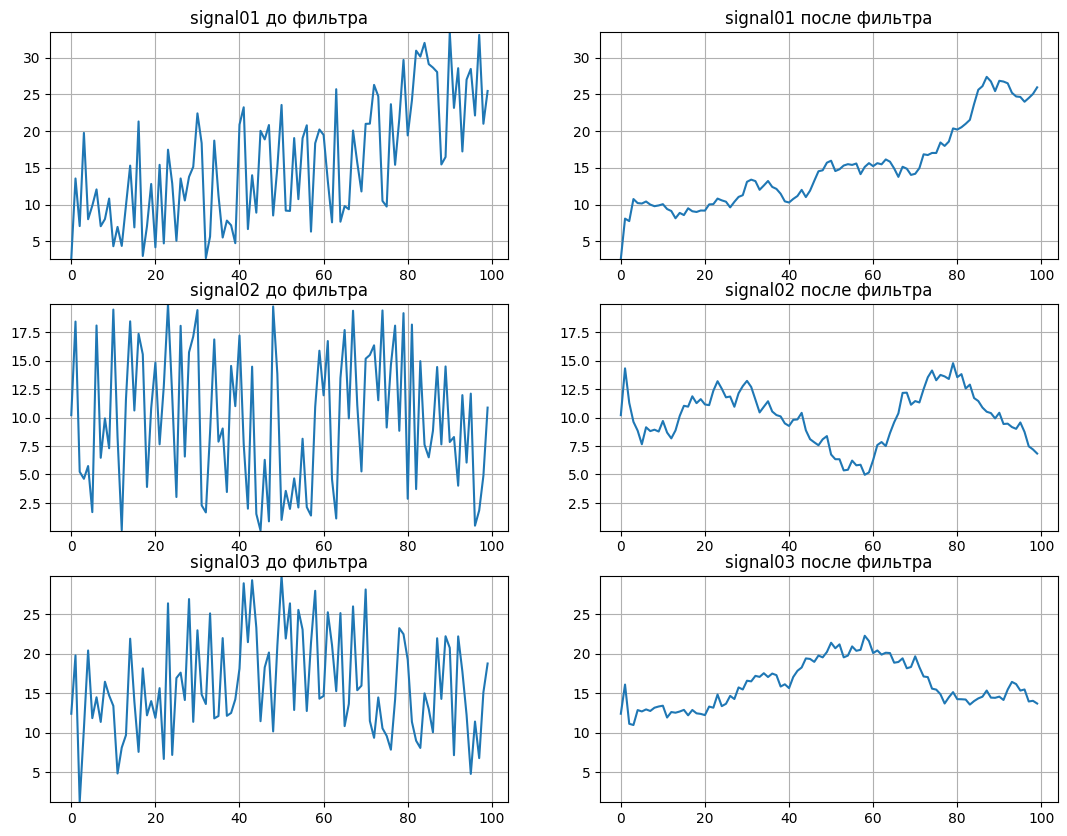

In [21]:
episode_2(filter_range=10)

In [ ]:
# Дополнительно
import numpy as np
import scipy

---
#### Эпизод 3

##### Решение

Некоторый процесс описывается следующим уравнением:
$$u^{n+1} = u^n - 0.5 A u^n$$
То есть на главной диагонали расположены элементы 1, с циклическим сдвигом влево на один элемент от главной диагонали расположены -1, все остальные элементы 0.

Посчитайте и визуализируйте 255 шагов по времени этого процесса.


In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def episode_3(times: int = 255, fps = 60):
    global a
    with open('laba03/start.dat', 'r') as f:
        a = np.array([float(i) for i in f.read().split('\n')])

    n = len(a)
    x = range(n)
    A = np.eye(n) + np.roll(-np.eye(n), -1, axis=1)

    def modeling():
        global a
        a = a - A @ a / 2

    fig, ax = plt.subplots()
    ln, = ax.plot(x, a)
    ax.grid()

    def update(frame):
        modeling()
        ln.set_data(x, a)
        return ln,
    
    ani = FuncAnimation(fig, update, frames=range(times))
    ani.save('laba03/animation.gif', writer='pillow', fps=fps)

##### Отображение

In [ ]:
episode_3(times=255, fps=60)

![](laba03/animation.gif)